In [6]:


#Importación de Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

#Importación del Dataset
pd.read_csv('Credit_card_clients2.csv')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,300000,1,1,1,47,-2,-2,-2,-2,...,4509,7155,5778,225,4019,3860,5000,5778,23978,0
2496,2497,300000,2,1,2,28,-1,-1,-1,-1,...,10534,1954,2140,2964,27968,10597,1954,2140,390,0
2497,2498,210000,2,3,2,45,-2,-2,-1,-1,...,316,316,316,312,2376,316,316,316,8611,0
2498,2499,50000,1,3,1,36,0,0,0,0,...,70579,63751,56977,2846,2671,2396,2177,2146,2055,1


Elevator Pitch: ¿Su entidad bancaria está desarrollando campañas de marketing sobre planes de crédito, pero le cuesta mucho tiempo saber a qué publico se los puede derigir? Soy Alejandro Clas y estoy encontrando formas de predecir a nuestros futuros clientes basándonos en sus características demográficas, para así destinar nuestros recursos de mercadeo a ese sector, y brindarles experiencia y descuentos particulares.

Este trabajo tiene como objetivo entender si se puede predecir estadísticamente el límite de crédito de las personas en base a su edad.

Fuente del dataset:
https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Default%20of%20Credit%20Card%20Clients


Contexto Comercial: Este análisis puede ser relevante para instituciones financieras que buscan entender mejor cómo la edad de sus clientes puede influir en la asignación de límites de crédito, de esa manera podría mejorar las políticas crediticias y optimizar la asignación de recursos. Ya que, al ofrecer promociones de disponibilidad de crédito, se sabrá en qué rangos etarios el cliente objetivo pertenece.

En nuestra exploración de datos, se llevaron a cabo análisis estadísticos y visualizaciones para comprender la distribución del límite de crédito en diferentes grupos de edad, identificando posibles áreas de interés para futuros análisis o ajustes en las estrategias comerciales.


Hipótesis

¿Podemos deducir el promedio el límite de crédito de cada persona por su edad?

Nosotros habíamos realizado dos análisis:
En el primero habíamos agrupado los datos por edad y calculamos el promedio del límite del crédito para cada grupo de edad, visualizamos esta relación por medio de un gráfico de barras.


Análisis del dataset

In [7]:
#Creación de nuestra variable Data, que contendrá el dataset.
data = pd.read_csv('Credit_card_clients2.csv')

#Tamaño
data.shape

#Descripción
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,2500.00000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,165168.000000,1.578000,1.80760,1.579600,35.398800,0.011600,-0.127200,-0.142000,-0.240800,...,41413.527200,39944.530400,38689.852800,5540.442000,5146.280000,4799.010000,4816.960800,4915.183200,5054.256800,0.222400
std,721.83216,129109.718859,0.493977,0.75552,0.525142,9.464438,1.128528,1.215406,1.255415,1.182952,...,67624.971224,63999.761348,65013.148724,13691.003321,14365.863065,21747.203288,14006.323603,16671.568565,19705.808262,0.415942
min,1.00000,10000.000000,1.000000,1.00000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,625.75000,50000.000000,1.000000,1.00000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1931.500000,1604.500000,1050.000000,904.750000,562.000000,250.250000,240.000000,247.750000,0.000000,0.000000
50%,1250.50000,140000.000000,2.000000,2.00000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18029.500000,17709.500000,15873.000000,2100.000000,1990.000000,1451.000000,1500.000000,1500.000000,1314.000000,0.000000
75%,1875.25000,230000.000000,2.000000,2.00000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49304.000000,48686.000000,47643.000000,5000.000000,4863.000000,4000.000000,4000.000000,4000.000000,4000.000000,0.000000
max,2500.00000,1000000.000000,2.000000,6.00000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000,1.000000


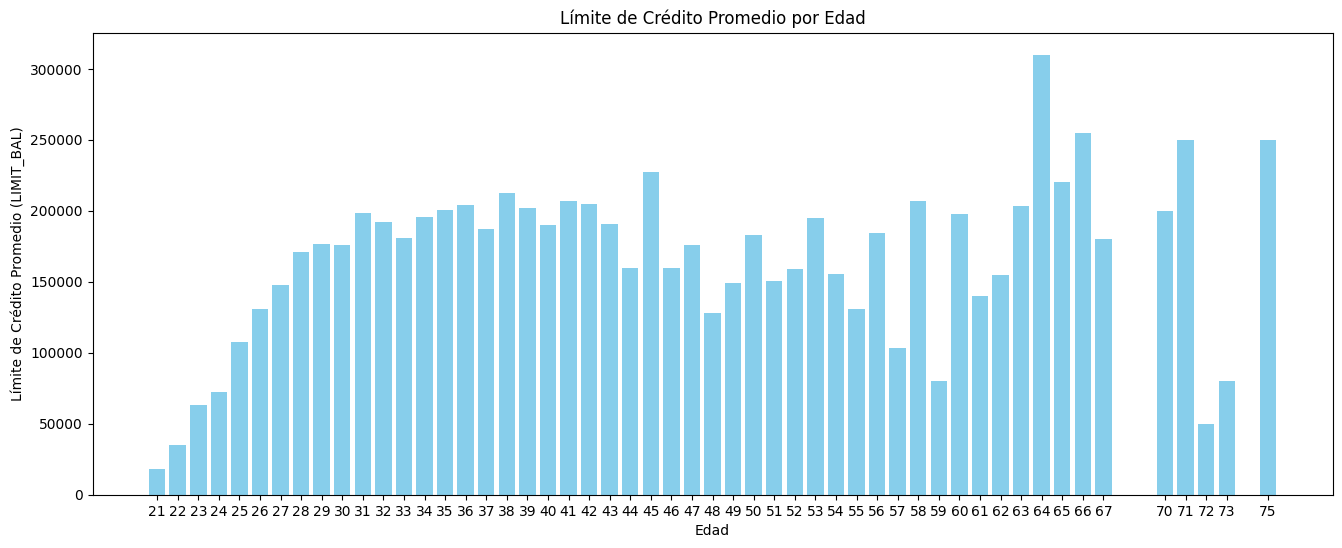

In [8]:
# Agrupo por edades y calculo la media del límite de crédito (LIMIT_BAL)
age_groups = data.groupby('AGE')['LIMIT_BAL'].mean()

# Creo el gráfico de barras
plt.figure(figsize=(16, 6))
plt.bar(age_groups.index, age_groups.values, width=0.8, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito Promedio (LIMIT_BAL)')
plt.title('Límite de Crédito Promedio por Edad')
plt.xticks(age_groups.index)
plt.show()

In [9]:
#Un viztazo a los datos:
data.head()
data.describe()

data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Variables numéricas:

-edad

-Credit score

Preguntas de interés:
¿Existe una relación significativa entre la edad y el límite del crédito?

Entre los grupos de 27 y 42 años, no existen diferencias significativas. Esto también se incluye en otros grupos como los que tienen 47, 50, 53, 58 y 60 años.


En el segundo análisis, examinamos la distribución de las edades en relación con la frecuencia de crédito.

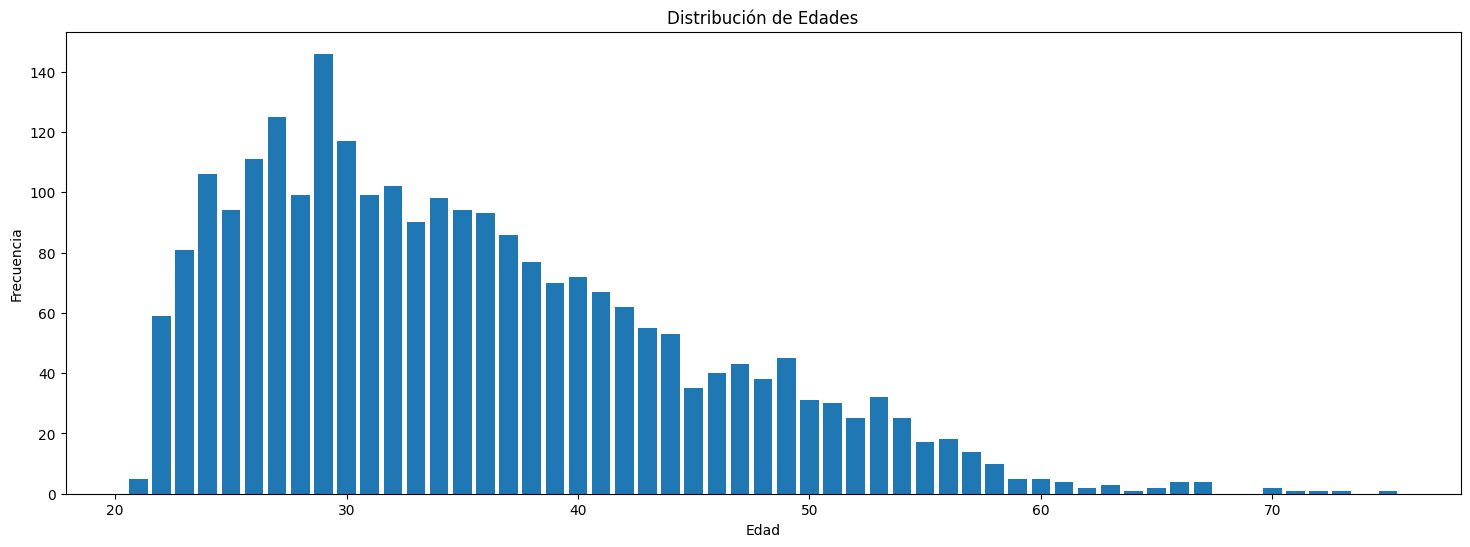

In [11]:
plt.figure(figsize=(18, 6))
plt.bar(data['AGE'].value_counts().index, data['AGE'].value_counts().values)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')

plt.show()

No obstante, podemos observar que el hecho de que haya pocas personas entre el rango de 60 y 71 años, influye en el promedio de la cantidad de límite de crédito, por lo tanto, no se puede deducir que la gente con ese rango de edad se le otorgue, en su mayoria, ese límite de crédito.

Insights observados:
Aunque se observó un promedio similar en el límite de crédito entre los grupos de 27 y 42 años, la recomendación es continuar con el análisis, para entender las variabilidades entre estos grupos, por ejemplo, según el nivel educativo y el género.
Y se debe tener precaución por el promedio del límite de crédito en grupos con poca representación, como en el rango de edad de 60 a 71 años, ya que las conclusiones pueden estar sesgadas por el bajo número de observaciones.

Contexto Comercial: Este análisis puede ser relevante para instituciones financieras que buscan entender mejor cómo la edad de sus clientes puede influir en la asignación de límites de crédito, de esa manera podría mejorar las políticas crediticias y optimizar la asignación de recursos. Ya que, al ofrecer promociones de disponibilidad de crédito, se sabrá en qué rangos etarios el cliente objetivo pertenece.



## Data Wrangling

Primero veamos cuantos valores tenemos. Y después veremos cuántos valores nulos hay.



In [12]:
print(data.index)
print(data.values)
print(data.count())

RangeIndex(start=0, stop=2500, step=1)
[[     1  20000      2 ...      0      0      1]
 [     2 120000      2 ...      0   2000      1]
 [     3  90000      2 ...   1000   5000      0]
 ...
 [  2498 210000      2 ...    316   8611      0]
 [  2499  50000      1 ...   2146   2055      1]
 [  2500 340000      2 ...   3600   3169      0]]
ID                            2500
LIMIT_BAL                     2500
SEX                           2500
EDUCATION                     2500
MARRIAGE                      2500
AGE                           2500
PAY_0                         2500
PAY_2                         2500
PAY_3                         2500
PAY_4                         2500
PAY_5                         2500
PAY_6                         2500
BILL_AMT1                     2500
BILL_AMT2                     2500
BILL_AMT3                     2500
BILL_AMT4                     2500
BILL_AMT5                     2500
BILL_AMT6                     2500
PAY_AMT1                      2

In [13]:
data.isna() #nulos
datos_faltantes = data.isnull()
datos_faltantes.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Contar los valores faltantes de cada columna.
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print (datos_faltantes[column].value_counts())
    print("")

ID
ID
False    2500
Name: count, dtype: int64

LIMIT_BAL
LIMIT_BAL
False    2500
Name: count, dtype: int64

SEX
SEX
False    2500
Name: count, dtype: int64

EDUCATION
EDUCATION
False    2500
Name: count, dtype: int64

MARRIAGE
MARRIAGE
False    2500
Name: count, dtype: int64

AGE
AGE
False    2500
Name: count, dtype: int64

PAY_0
PAY_0
False    2500
Name: count, dtype: int64

PAY_2
PAY_2
False    2500
Name: count, dtype: int64

PAY_3
PAY_3
False    2500
Name: count, dtype: int64

PAY_4
PAY_4
False    2500
Name: count, dtype: int64

PAY_5
PAY_5
False    2500
Name: count, dtype: int64

PAY_6
PAY_6
False    2500
Name: count, dtype: int64

BILL_AMT1
BILL_AMT1
False    2500
Name: count, dtype: int64

BILL_AMT2
BILL_AMT2
False    2500
Name: count, dtype: int64

BILL_AMT3
BILL_AMT3
False    2500
Name: count, dtype: int64

BILL_AMT4
BILL_AMT4
False    2500
Name: count, dtype: int64

BILL_AMT5
BILL_AMT5
False    2500
Name: count, dtype: int64

BILL_AMT6
BILL_AMT6
False    2500
Name: count, dtyp

Podemos observar que este código no tiene datos nulos. El máximo de filas es 2500, y todas las columnas poseen de esa cantidad de filas. En caso de que el data frame tenga datos nulos, este sería el código para transformarlos en nulos:

In [ ]:
data.replace("?", np.nan, inplace = True)
data.head(5)
# En caso de que los datos nulos tuvieran el signo "?"

De acuerdo con bankeate
https://www.bankrate.com/finance/credit-cards/what-is-the-average-credit-limit-for-americans/

La demografía con más alto límite de crédito son los Baby Boomers
¿Se aplicará también en nuestro análisis?
Para eso podemos utilizar uno de estos tres modelos de regresión, ya que estamos hablando de una variable continua, que es el límite de crédito, y averiguar cuál es el más conveniente:
-Regresión lineal
-Regresión de vecinos más cercanos
-Regresión de bosque aleatorio

Algoritmo de regresión lineal

Error cuadrático medio: 16896228901.968842


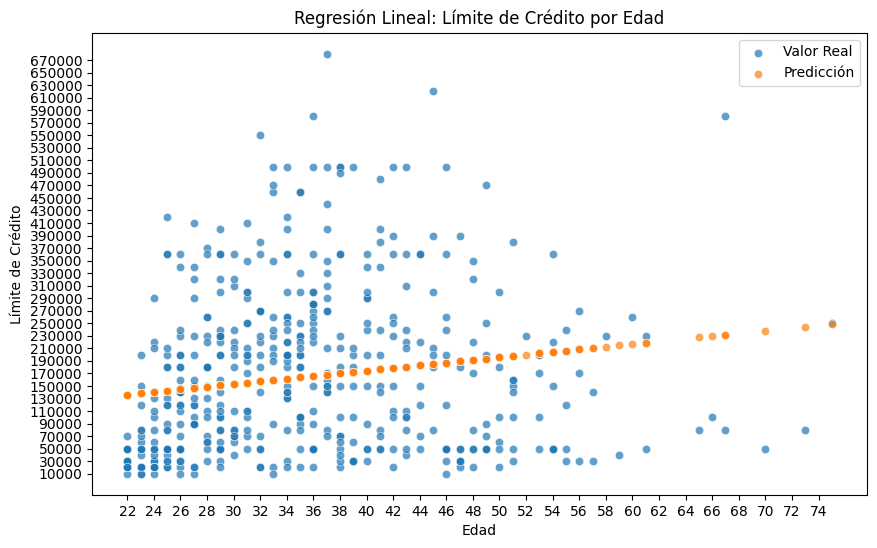

In [19]:
# X será la edad, y será el límite de crédito
X = data[['AGE']]
y = data['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entreno el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions = linear_model.predict(X_test)

# Evalúo el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio: {mse}")

# Grafico los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, label='Valor Real', alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions, label='Predicción', alpha=0.7)
# Agrego detalles a la leyenda
plt.xticks(range(int(X_test['AGE'].min()), int(X_test['AGE'].max())+1, 2))
plt.yticks(range(int(y_test.min()), int(y_test.max())+1, 20000))
plt.title('Regresión Lineal: Límite de Crédito por Edad')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.legend()
plt.show()

In [16]:
#Ahora calcularemos la correlación entre los límites de crédito y las edades.

correlacion = data['AGE'].corr(data['LIMIT_BAL'])
print(correlacion)

0.15292409963531772


El coeficiente de correlación (R) es aproximadamente 0.153, lo que indica una correlación positiva débil entre los límites de crédito ('LIMIT_BAL') y las edades ('AGE').
Hay una leve tendencia de que los límites de crédito aumenten conforme a la edad, pero es muy poco lo que aumenta.

Ahora analizaremos las predicciones del límite de crédito según la generación Z y millenials.
Y según La generación X y los Boomers
Supongamos que estamos en 2023.
Generación Z y Millenials (1981-2010): gente entre los 20 y 41 años.

Generación X y los Boomers (1946 y 1968): Gente de más de entre 41 y 74 años.

Error cuadrático medio: 14395581594.337322


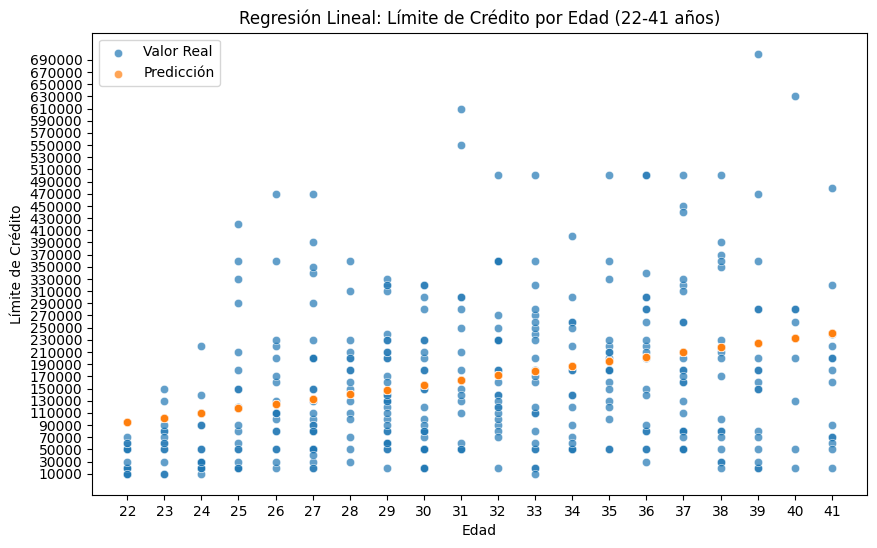

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Filtro las edades entre 22 y 41 años
filtered_data = data[(data['AGE'] >= 22) & (data['AGE'] <= 41)]

# X será la edad, y será el límite de crédito
X = filtered_data[['AGE']]
y = filtered_data['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions = linear_model.predict(X_test)

# Evalúo el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio: {mse}")

# Grafico los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, label='Valor Real', alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions, label='Predicción', alpha=0.7)

# Ajusto los límites y los ticks de los ejes
plt.xticks(range(int(X_test['AGE'].min()), int(X_test['AGE'].max())+1, 1))
plt.yticks(range(int(y_test.min()), int(y_test.max())+1, 20000))

plt.title('Regresión Lineal: Límite de Crédito por Edad (22-41 años)')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.legend()
plt.show()

In [ ]:
#Acá utilizaremos .corrwith(), porque .corr() no ha funcionado, además que el primer código funciona mejor para columnas específicas.
correlacion2 = filtered_data[['AGE']].corrwith(filtered_data['LIMIT_BAL'])
print(correlacion2)

AGE    0.32018
dtype: float64


Acá observamos que existe una correlación (entre la edad y el límite de crédito) un poco más alta en este grupo (Generación Z y Millenials) que si tuvieramos que incluir a todos los grupos. No obstante, sigue siendo bastante baja. De tendencia positiva.

Aquí me había dado error, porque debo convertir estas partes del dataframe en

Error cuadrático medio: 19736477437.267513


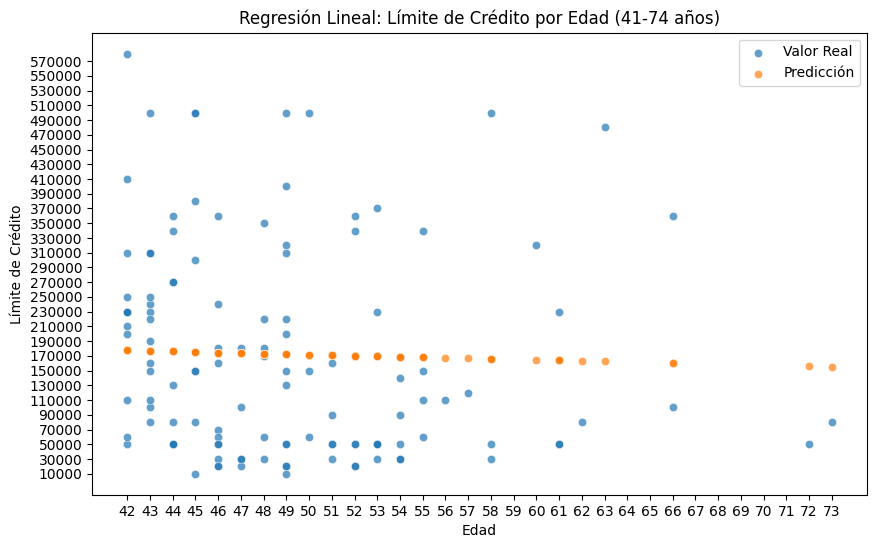

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Filtro las edades entre 22 y 41 años
filtered_data2 = data[(data['AGE'] >= 42) & (data['AGE'] <= 74)]

# X será la edad, y será el límite de crédito
X = filtered_data2[['AGE']]
y = filtered_data2['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions = linear_model.predict(X_test)

# Evalúo el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio: {mse}")

# Grafico los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, label='Valor Real', alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions, label='Predicción', alpha=0.7)

# Ajusto los límites y los ticks de los ejes
plt.xticks(range(int(X_test['AGE'].min()), int(X_test['AGE'].max())+1, 1))
plt.yticks(range(int(y_test.min()), int(y_test.max())+1, 20000))

plt.title('Regresión Lineal: Límite de Crédito por Edad (41-74 años)')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.legend()
plt.show()

Algo que es muy interesante es que entre los la generación x y los boomers se puede ofrecer un límite de crédito inical de entre los 150.000 y 180.000. Un umbral más pequeño.

In [ ]:
correlacion3 = filtered_data2[['AGE']].corrwith(filtered_data2['LIMIT_BAL'])
print(correlacion2)

AGE    0.32018
dtype: float64


En este grupo etario (de la generación X más los boomers), también existe una correlación cerca del 0,32, no obstante, ésta es negativa.

Pero ahora vayamos al siguiente modelo de predicción.

Algortinmo de vecinos más cercanos

Para el modelo KNN, el Error cuadrático medio es: 15473777777.777779


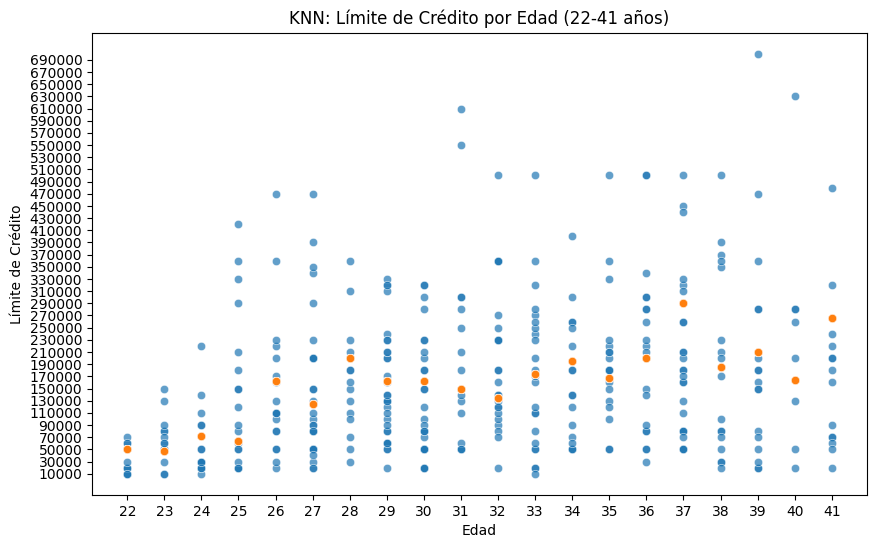

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Filtro edades entre 22 y 41 años
filtered_data_knn = data[(data['AGE'] >= 22) & (data['AGE'] <= 41)]

# X será la edad, y será el límite de crédito
X_knn = filtered_data_knn[['AGE']]
y_knn = filtered_data_knn['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Inicio y entreno el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)

# Realizo predicciones en el conjunto de prueba
predictions_knn = knn_model.predict(X_test_knn)

# Evalúo el rendimiento del modelo KNN
mse_knn = mean_squared_error(y_test_knn, predictions_knn)
print(f"Para el modelo KNN, el Error cuadrático medio es: {mse_knn}")

# Grafico los resultados KNN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_knn['AGE'], y=y_test_knn, alpha=0.7)
sns.scatterplot(x=X_test_knn['AGE'], y=predictions_knn, alpha=0.7)


# Ajusto los límites y los ticks de los ejes
plt.xticks(range(int(X_test_knn['AGE'].min()), int(X_test_knn['AGE'].max())+1, 1))
plt.yticks(range(int(y_test_knn.min()), int(y_test_knn.max())+1, 20000))

plt.title('KNN: Límite de Crédito por Edad (22-41 años)')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.show()

Error cuadrático medio (KNN): 16555120000.0


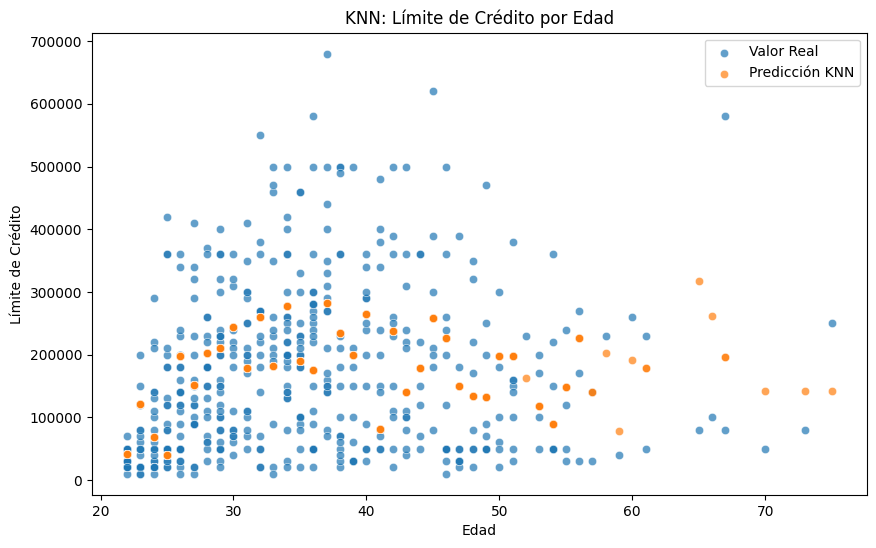

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# X será la edad, y será el límite de crédito
X = data[['AGE']]
y = data['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entreno el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions_knn = knn_model.predict(X_test)

# Evalúo el rendimiento del modelo
mse_knn = mean_squared_error(y_test, predictions_knn)
print(f"Error cuadrático medio (KNN): {mse_knn}")

# Grafico los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, label='Valor Real', alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions_knn, label='Predicción KNN', alpha=0.7)

plt.title('KNN: Límite de Crédito por Edad')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.show()

Con este modelo obtenemos una aproximación más cercana del límite de crédito promeedio, con base en la edad. Como estrategia propuesta, se puede realizar una campaña por correo electrónico para brindar un límite de crédito inical a la gente por su determinada edad (si se trata de clientes nuevos).

Vamos al último modelo de predicción.

Modelo de regresión de bosque aleatorio

Para el modelo de Regresión de Bosque Aleatorio, el Error cuadrático medio es: 15459006225.235472


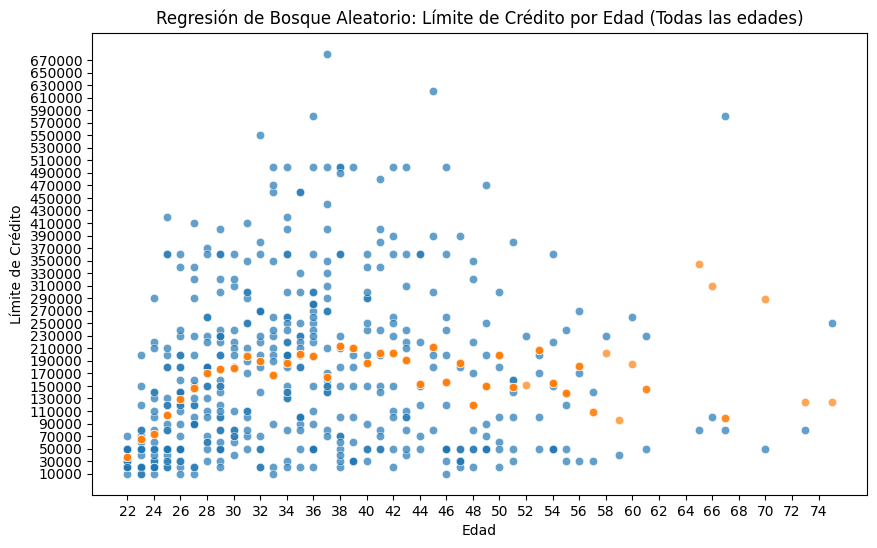

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

X = data[['AGE']]
y = data['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entreno el modelo de Regresión de Bosque Aleatorio
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions_rf = rf_model.predict(X_test)

# Evalúo el rendimiento del modelo de Regresión de Bosque Aleatorio
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Para el modelo de Regresión de Bosque Aleatorio, el Error cuadrático medio es: {mse_rf}")

# Grafico los resultados de Regresión de Bosque Aleatorio
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions_rf, alpha=0.7)

# Ajusto los límites y los ticks de los ejes
plt.xticks(range(int(X_test['AGE'].min()), int(X_test['AGE'].max())+1, 2))
plt.yticks(range(int(y_test.min()), int(y_test.max())+1, 20000))

plt.title('Regresión de Bosque Aleatorio: Límite de Crédito por Edad (Todas las edades)')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.show()

Seguiremos la misma estrategia de mails que en la estrategia decidida en el modelo anterior.

Podemos observar que esta tendencia de los límites de crédito aumentando a travez de la edad, también se repite en bancos como el de Indonesia.

https://www.researchgate.net/publication/358599196_The_Demographic_and_Behavior_Determinant_of_Credit_Card_Default_in_Indonesia


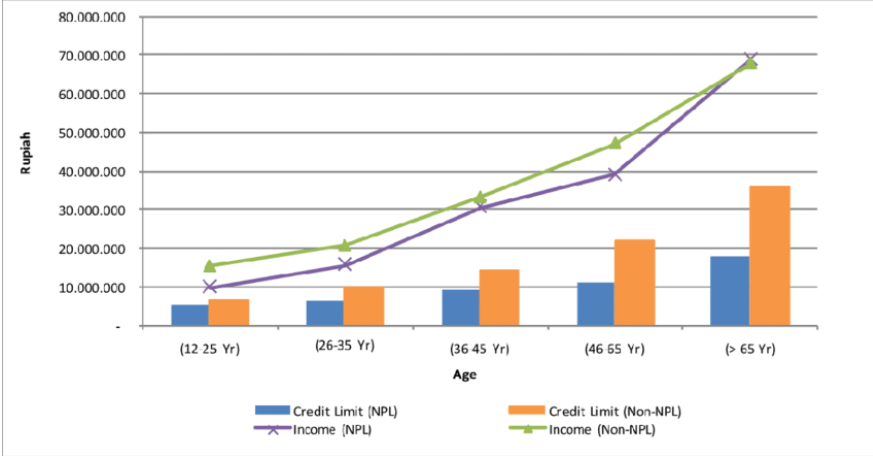

Otra forma de analizar los límites de crédito con la edad, es a través del credit score. Cuanto más alto este sea, mayor crédito tendrá el usuario. Y se observa que a mayor edad, mayor credit score, por lo tanto, mayor crédito.


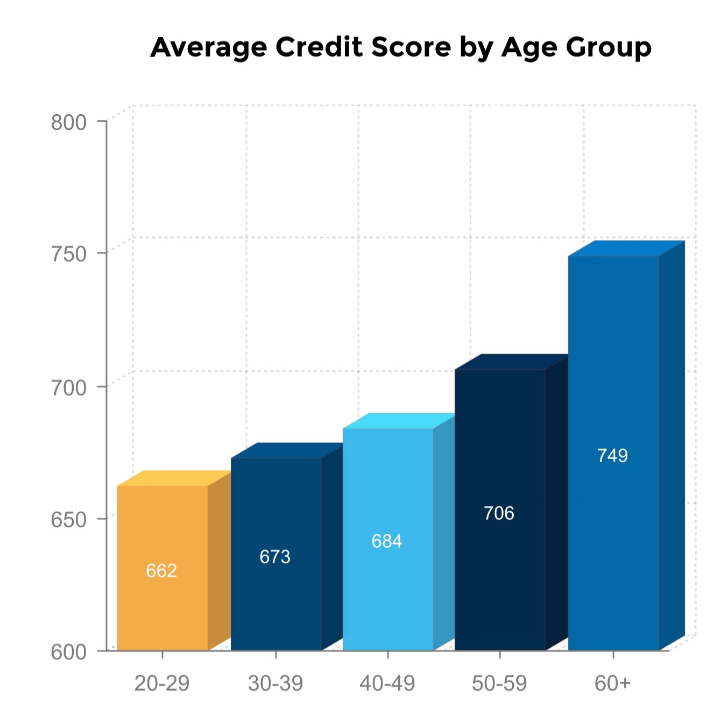


https://shiftprocessing.com/credit-score/#age

Eliminación de Outliers

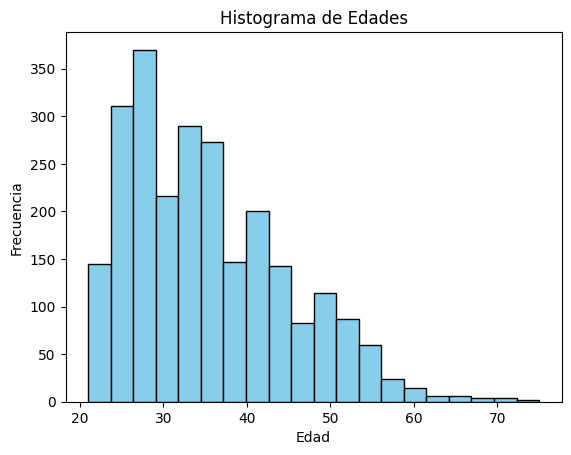

Estadístico: 0.943366289138794 , Valor p: 5.994159786933384e-30
Se rechaza la hipótesis nula (los datos no parecen seguir una distribución normal)


In [42]:
#Primero, averiguaremos si nuestro valor es normal o no.
import matplotlib.pyplot as plt

plt.hist(data['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()



#Preuba de normalidad
from scipy.stats import shapiro

#Shapiro-Wilk
stat, p = shapiro(data['AGE'])
print('Estadístico:', stat, ', Valor p:', p)

# Interpreto el resultado
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (los datos parecen seguir una distribución normal)')
else:
    print('Se rechaza la hipótesis nula (los datos no parecen seguir una distribución normal)')


Como no se trata de una distribución normal, calcularemos el rango intercuartílico.

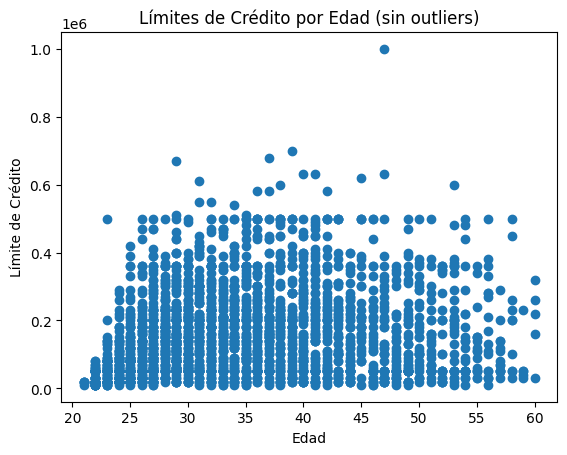

In [22]:
Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1

#Defino los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico outliers
outliers = data[(data['AGE'] < lower_bound) | (data['AGE'] > upper_bound)]



#Ahora, elimino los outliers de Outliers
import pandas as pd
import matplotlib.pyplot as plt

# Una vez calculados los límites para definir los valores de edad atípico, utilizando el rango intercuartílico, filtro el dataframe
#para excluir las observaciones con edades atípicas
Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtro el DataFrame para excluir las observaciones con edades atípicas
data_filtered = data[(data['AGE'] >= lower_bound) & (data['AGE'] <= upper_bound)]

# Gracfico los límites de crédito solo para las edades que no son consideradas atípicas
plt.scatter(data_filtered['AGE'], data_filtered['LIMIT_BAL'])
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.title('Límites de Crédito por Edad (sin outliers)')
plt.show()

Ahora, vamos a ver cómo quedan los Algoritmos sin Outliers

Algoritmo de Regresión Lineal

Error cuadrático medio: 16563930526.683416


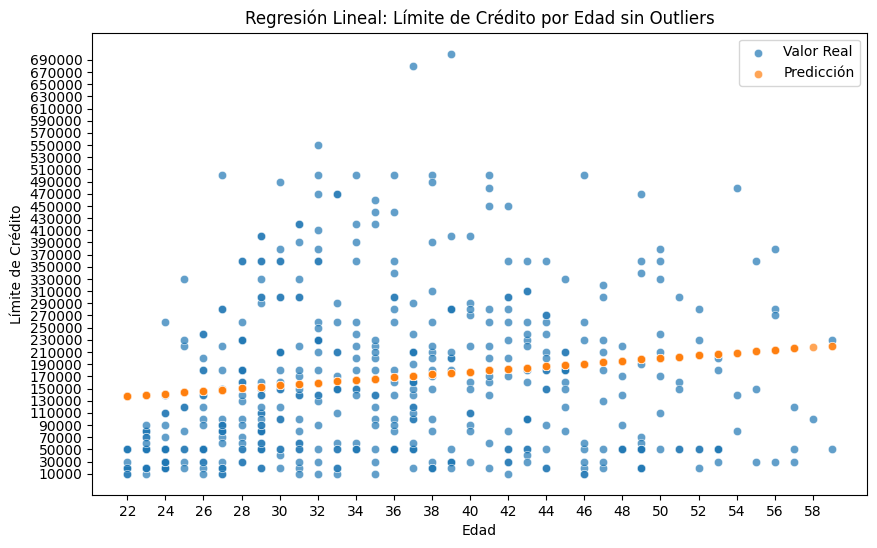

0.15577899989299207


In [28]:
# X será la edad, y será el límite de crédito
X = data_filtered[['AGE']]
y = data_filtered['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entreno el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions = linear_model.predict(X_test)

# Evalúo el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio: {mse}")

# Grafico los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, label='Valor Real', alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions, label='Predicción', alpha=0.7)
# Agrego detalles a la leyenda
plt.xticks(range(int(X_test['AGE'].min()), int(X_test['AGE'].max())+1, 2))
plt.yticks(range(int(y_test.min()), int(y_test.max())+1, 20000))
plt.title('Regresión Lineal: Límite de Crédito por Edad sin Outliers')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.legend()
plt.show()

correlacion = data_filtered['AGE'].corr(data['LIMIT_BAL'])
print(correlacion)

Por lo que se ve, nos muestra una relación débil. Por eso, tenemos que avanzar con el siguiente modelo.

Algoritmo de vecinos más cercanos

Error cuadrático medio (KNN): 17085406060.60606


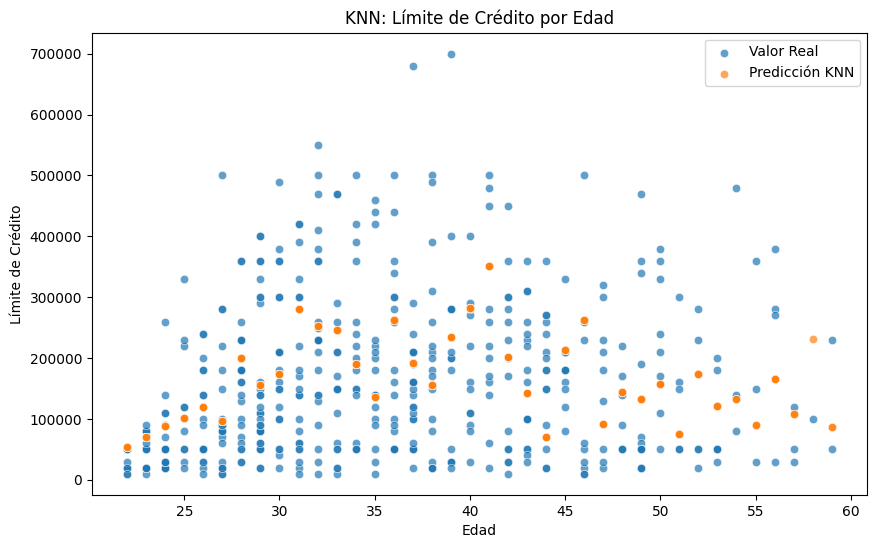

In [31]:
# X será la edad, y será el límite de crédito
X = data_filtered[['AGE']]
y = data_filtered['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entreno el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions_knn = knn_model.predict(X_test)

# Evalúo el rendimiento del modelo
mse_knn = mean_squared_error(y_test, predictions_knn)
print(f"Error cuadrático medio (KNN): {mse_knn}")

# Grafico los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, label='Valor Real', alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions_knn, label='Predicción KNN', alpha=0.7)

plt.title('KNN: Límite de Crédito por Edad')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.show()

Modelo de Regresión del bosque aleatorio

Para el modelo de Regresión de Bosque Aleatorio, el Error cuadrático medio es: 15397856305.716959


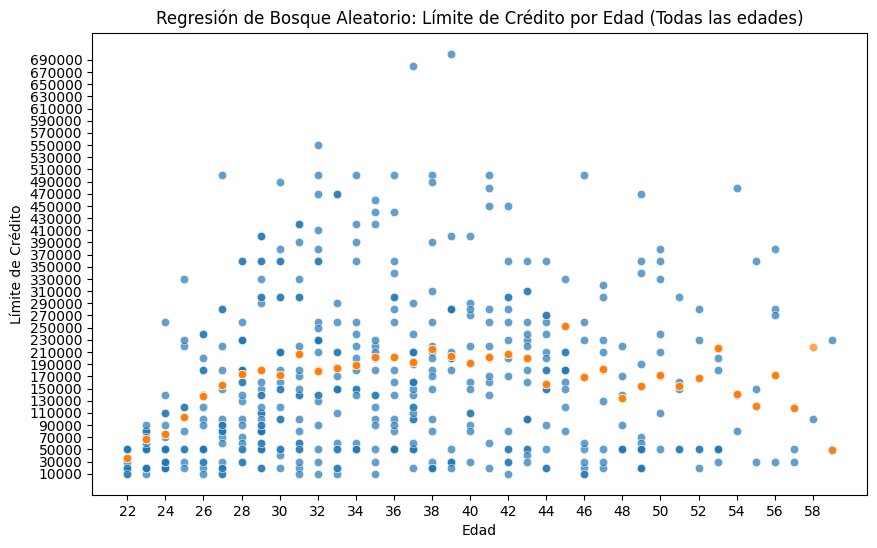

In [32]:
X = data_filtered[['AGE']]
y = data_filtered['LIMIT_BAL']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicio y entreno el modelo de Regresión de Bosque Aleatorio
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
predictions_rf = rf_model.predict(X_test)

# Evalúo el rendimiento del modelo de Regresión de Bosque Aleatorio
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Para el modelo de Regresión de Bosque Aleatorio, el Error cuadrático medio es: {mse_rf}")

# Grafico los resultados de Regresión de Bosque Aleatorio
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AGE'], y=y_test, alpha=0.7)
sns.scatterplot(x=X_test['AGE'], y=predictions_rf, alpha=0.7)

# Ajusto los límites y los ticks de los ejes
plt.xticks(range(int(X_test['AGE'].min()), int(X_test['AGE'].max())+1, 2))
plt.yticks(range(int(y_test.min()), int(y_test.max())+1, 20000))

plt.title('Regresión de Bosque Aleatorio: Límite de Crédito por Edad (Todas las edades)')
plt.xlabel('Edad')
plt.ylabel('Límite de Crédito')
plt.show()

LOOCV

Ahora es momento de validar el modelo con la validación cruzada Leave-One-Out

Para la regresión Lineal

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicio una lista para almacenar los errores cuadráticos medios (MSE)
mse_scores = []

# Itero sobre cada punto de datos en X
for i in range(len(X)):
    # Selecciono el punto de datos actual como el que dejaré fuera
    X_leave_one_out = X.iloc[[i]]
    y_leave_one_out = y.iloc[[i]]

    # Elimino el punto de datos actual del conjunto de entrenamiento
    X_train_loocv = X.drop(X_leave_one_out.index)
    y_train_loocv = y.drop(y_leave_one_out.index)

    # Inicio y entreno el modelo de Regresión Lineal
    linear_model = LinearRegression()
    linear_model.fit(X_train_loocv, y_train_loocv)

    # Realizo predicciones en el punto de datos que dejamos fuera
    y_pred_leave_one_out = linear_model.predict(X_leave_one_out)

    # Calculo el error cuadrático medio (MSE) para este punto de datos
    mse = mean_squared_error(y_leave_one_out, y_pred_leave_one_out)
    mse_scores.append(mse)

# Calculo el MSE promedio de todos los puntos de datos
avg_mse = np.mean(mse_scores)
print(f'Error cuadrático medio promedio LOOCV: {avg_mse}')

Error cuadrático medio promedio LOOCV: 16206301827.471115


In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Inicializo una lista para almacenar los errores cuadráticos medios (MSE)
mse_scores = []

# Itero sobre cada punto de datos en X
for i in range(len(X)):
    # Selecciono el punto de datos actual como el que dejaré fuera
    X_leave_one_out = X.iloc[[i]]
    y_leave_one_out = y.iloc[[i]]

    # Elimino el punto de datos actual del conjunto de entrenamiento
    X_train_loocv = X.drop(X_leave_one_out.index)
    y_train_loocv = y.drop(y_leave_one_out.index)

    # Inicio y entreno el modelo de KNN
    knn_model = KNeighborsRegressor(n_neighbors=5)  # ajusta el número de vecinos según sea necesario
    knn_model.fit(X_train_loocv, y_train_loocv)

    # Realizo predicciones en el punto de datos que dejamos fuera
    y_pred_leave_one_out = knn_model.predict(X_leave_one_out)

    # Calculo el error cuadrático medio (MSE) para este punto de datos
    mse = mean_squared_error(y_leave_one_out, y_pred_leave_one_out)
    mse_scores.append(mse)

# Calculo el MSE promedio de todos los puntos de datos
avg_mse = np.mean(mse_scores)
print(f'Error cuadrático medio promedio LOOCV con KNN: {avg_mse}')

Error cuadrático medio promedio LOOCV con KNN: 18385356507.67987


Modelo de Bosque aleatorio

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Inicializo una lista para almacenar los errores cuadráticos medios (MSE)
mse_scores = []

# Itero sobre cada punto de datos en X
for i in range(len(X)):
    # Selecciono el punto de datos actual como el que dejaremos fuera
    X_leave_one_out = X.iloc[[i]]
    y_leave_one_out = y.iloc[[i]]

    # Elimino el punto de datos actual del conjunto de entrenamiento
    X_train_loocv = X.drop(X_leave_one_out.index)
    y_train_loocv = y.drop(y_leave_one_out.index)

    # Inicializo y entreno el modelo de Regresión de Bosque Aleatorio
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_loocv, y_train_loocv)

    # Realizo predicciones en el punto de datos que dejamos fuera
    y_pred_leave_one_out = rf_model.predict(X_leave_one_out)

    # Calculo el error cuadrático medio (MSE) para este punto de datos
    mse = mean_squared_error(y_leave_one_out, y_pred_leave_one_out)
    mse_scores.append(mse)

# Calculo el MSE promedio de todos los puntos de datos
avg_mse = np.mean(mse_scores)
print(f'Error cuadrático medio promedio LOOCV: {avg_mse}')

Error cuadrático medio promedio LOOCV: 15087938339.078423


K-Fold cross validation

Para la regresión Lineal

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Defino el número de pliegues para K-Fold Cross-Validation
k = 5

# Inicio una lista para almacenar los errores cuadráticos medios (MSE)
mse_scores = []

# Inicio el generador de pliegues para K-Fold Cross-Validation
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Itero sobre cada pliegue y realizo la validación cruzada
for train_index, test_index in kf.split(X):
    # Divido el conjunto de datos en entrenamiento y prueba para este pliegue
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Inicializo y entreno el modelo de Regresión Lineal para este pliegue
    linear_model_kf = LinearRegression()
    linear_model_kf.fit(X_train_kf, y_train_kf)
    
    # Realizar predicciones en el conjunto de prueba para este pliegue
    predictions_kf = linear_model_kf.predict(X_test_kf)
    
    # Calculo el error cuadrático medio (MSE) para este pliegue
    mse_kf = mean_squared_error(y_test_kf, predictions_kf)
    mse_scores.append(mse_kf)

# Calculo el MSE promedio de todos los pliegues
avg_mse = np.mean(mse_scores)
print(f'Error cuadrático medio promedio usando K-Fold Cross-Validation: {avg_mse}')

Error cuadrático medio promedio usando K-Fold Cross-Validation: 16209539053.787983


Para los vecinos más cercanos

In [48]:
# Defino el número de pliegues para K-Fold Cross-Validation
k = 5

# Inicializo una lista para almacenar los errores cuadráticos medios (MSE)
mse_scores_knn = []

# Inicializo el generador de pliegues para K-Fold Cross-Validation
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Itero sobre cada pliegue y realizo la validación cruzada
for train_index, test_index in kf.split(X):
    # Divido el conjunto de datos en entrenamiento y prueba para este pliegue
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Inicializo y entreno el modelo KNN para este pliegue
    knn_model_kf = KNeighborsRegressor(n_neighbors=5)
    knn_model_kf.fit(X_train_kf, y_train_kf)
    
    # Realizo predicciones en el conjunto de prueba para este pliegue
    predictions_knn_kf = knn_model_kf.predict(X_test_kf)
    
    # Calculo el error cuadrático medio (MSE) para este pliegue
    mse_knn_kf = mean_squared_error(y_test_kf, predictions_knn_kf)
    mse_scores_knn.append(mse_knn_kf)

# Calculo el MSE promedio de todos los pliegues
avg_mse_knn = np.mean(mse_scores_knn)
print(f'Error cuadrático medio promedio usando K-Fold Cross-Validation (KNN): {avg_mse_knn}')

Error cuadrático medio promedio usando K-Fold Cross-Validation (KNN): 18019167437.942177


Para regresión del Bosque Aleatorio

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Defino el número de pliegues para K-Fold Cross-Validation
k = 5

# Inicializo una lista para almacenar los errores cuadráticos medios (MSE)
mse_scores_rf = []

# Inicializo el generador de pliegues para K-Fold Cross-Validation
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Itero sobre cada pliegue y realizo la validación cruzada
for train_index, test_index in kf.split(X):
    # Divido el conjunto de datos en entrenamiento y prueba para este pliegue
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Inicializo y entreno el modelo de Regresión de Bosque Aleatorio para este pliegue
    rf_model_kf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_kf.fit(X_train_kf, y_train_kf)
    
    # Realizo predicciones en el conjunto de prueba para este pliegue
    predictions_rf_kf = rf_model_kf.predict(X_test_kf)
    
    # Calculo el error cuadrático medio (MSE) para este pliegue
    mse_rf_kf = mean_squared_error(y_test_kf, predictions_rf_kf)
    mse_scores_rf.append(mse_rf_kf)

# Calculo el MSE promedio de todos los pliegues
avg_mse_rf = np.mean(mse_scores_rf)
print(f'Error cuadrático medio promedio usando K-Fold Cross-Validation (Random Forest): {avg_mse_rf}')